**Ejercicios guia 1**

11501568/11490434 [==============================] - 0s 0us/step


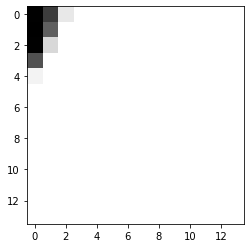

In [ ]:
#Dentro del conjunto de datos, seleccióne la esquina inferior que contenga 
#14×14 píxeles en cada una de las imágenes y visualice una de ellas. 

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

my_slice_corner = train_images[:, 14:, 14:]

digit = my_slice_corner[3] # train_images[3, 14:, 14:]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
#Escriba un código en Python que devuelva el máximo valor de un vector.

def max(x): 
  
    max = x[0] 
  
    for i in range(1, len(x)): 
        if x[i] > max: 
            max = x[i] 
    return max

max([0,2,1])


2

In [ ]:
#Creen una clase Point en coordenadas cartesianas, que se su constructor 
#inicialice el objeto a un punto con unas coordenadas dadas. Además, la clase debe contener dos métodos

class point:

    def __init__(self, x, y):

        self.x = x
        self.y = y
        
    def translate(self, dx, dy):

        self.x += dx
        self.y += dy
            
    def __str__(self):
        return("Las cordenadas de p son x:{} , y:{}".format (self.x, self.y))


p1 = point(1,1)
p1.translate(1,1)
print(p1)

Las cordenadas de p son x:2 , y:2


In [ ]:
import keras
from keras.datasets import fashion_mnist
from tensorflow import keras


fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

keras.backend.clear_session()


model = keras.models.Sequential();

model.add(keras.layers.Flatten(input_shape=[28, 28])); 
model.add(keras.layers.Dense(300, activation="relu"));
model.add(keras.layers.Dense(100, activation="relu"));
model.add(keras.layers.Dense(10, activation="softmax"));

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics=["accuracy"]) 

history =  model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))



4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7015 - accuracy: 0.7680 - val_loss: 0.5022 - val_accuracy: 0.8322
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4830 - accuracy: 0.8313 - val_loss: 0.4607 - val_accuracy: 0.8338
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4395 - accuracy: 0.8456 - val_loss: 0.4177 - val_accuracy: 0.8570
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4126 - accuracy: 0.8547 - val_loss: 0.3917 - val_accuracy: 0.8648
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3930 - accuracy: 0.8612 - val_loss: 0.3790 - val_accuracy: 0.8720
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3777 - accuracy: 0.8657 - val_loss: 0.3749 - val_accuracy: 0.8680
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - los

In [ ]:
#
import cv2
import numpy as np

img = cv2.imread("/content/camisa.png",cv2.IMREAD_GRAYSCALE)

img=cv2.resize(img, (28,28))
img = img.reshape((1,28,28))

y_pred = np.argmax(model.predict(img), axis=-1)
class_names[y_pred[0]]

'Shirt'

**Ejercicios guia 2**

In [ ]:
#Implementar un modelo de red neuronal usando Keras para predecir los sobrevivientes del titanic.
# El modelo debe tener dos capas ocultas densas con 16 neuronas cada una y funcion de activacion relu. como optimizador usar descenso del 
#gradiente estocástico como función de pérdida usar binary_crossentropy y como métrica usar accuracy. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from tensorflow import keras


data = pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso2/master/Datasets/titanic.csv')
data=data[["Survived","Pclass","Sex", "Age", "SibSp", "Fare", "Embarked"]]

data=data.dropna()

data=pd.get_dummies(data)

x_data= data.drop("Survived",axis=1)
y_data= data["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, random_state=0)
keras.backend.clear_session()

model = keras.models.Sequential()
model.add(keras.layers.Dense(16,activation='relu', input_shape=(9,) ))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

y_train=np.array(y_train)
y_test=np.array(y_test)


history=model.fit(x_train,y_train, epochs=15, validation_split=0.2)
x_data.head(10)


Epoch 1/15
15/15 [==============================] - 1s 14ms/step - loss: 1.3289 - accuracy: 0.6154 - val_loss: 1.2271 - val_accuracy: 0.6491
Epoch 2/15
15/15 [==============================] - 0s 4ms/step - loss: 0.7657 - accuracy: 0.6615 - val_loss: 0.8302 - val_accuracy: 0.5351
Epoch 3/15
15/15 [==============================] - 0s 3ms/step - loss: 0.7378 - accuracy: 0.6132 - val_loss: 0.6443 - val_accuracy: 0.6842
Epoch 4/15
15/15 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6527 - val_loss: 0.6672 - val_accuracy: 0.6404
Epoch 5/15
15/15 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6549 - val_loss: 0.5782 - val_accuracy: 0.7281
Epoch 6/15
15/15 [==============================] - 0s 4ms/step - loss: 0.6364 - accuracy: 0.6813 - val_loss: 0.8066 - val_accuracy: 0.6754
Epoch 7/15
15/15 [==============================] - 0s 3ms/step - loss: 0.6568 - accuracy: 0.6813 - val_loss: 0.6989 - val_accuracy: 0.6491
Epoch 8/15
15/15 [=

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,0,1,0,0,1
1,1,38.0,1,71.2833,1,0,1,0,0
2,3,26.0,0,7.9250,1,0,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,1
4,3,35.0,0,8.0500,0,1,0,0,1
6,1,54.0,0,51.8625,0,1,0,0,1
7,3,2.0,3,21.0750,0,1,0,0,1
8,3,27.0,0,11.1333,1,0,0,0,1
9,2,14.0,1,30.0708,1,0,1,0,0
10,3,4.0,1,16.7000,1,0,0,0,1


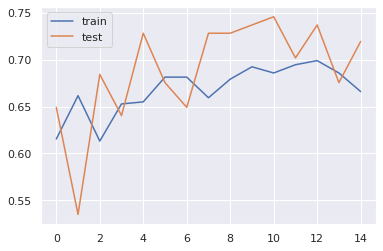

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()


**Ejercicios guia 3**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2)

#Con ayuda del pipeline de sklearn, construir uno de forma tal qué, escale mis datos, reduzca mi 
#dimensión(dimensión 2) y aplique un clasificador de arbol de decisión (DecisionTreeClassifier) 
#al iris data set, donde a este último solo le pondremos como parámetro el random_state=42. Entrenarlo y evaluarlo.

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


model=Pipeline([('pca',PCA(n_components=2)),('des_tree',DecisionTreeClassifier(random_state=42))])

model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('des_tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=42,
                                        splitter='best'))],
         verbose=False)

In [ ]:
#Haga una red neuronal de 2 capas (2 neuronas ocultas y 1 de salida) usando únicamente numpy para ajustar el XOR 
#usando la función escalera como función de activación. Tip: XOR=AND(OR,NAND)

import numpy as np

class neurona:

  def __init__(self,numeroPesos):
    #los pesos se generan aleatoriamente y no se pueden cambiar
    self.pesos=np.random.rand(numeroPesos)

  def process(self,x):
    
    producto=np.dot(self.pesos,x)
   #función escalón
    if producto<0:
      return 0
    return 1

class capa:
  def __init__(self,numeroNeuronas, conneccionesPorNeurona):
    self.neuronas = [neurona(conneccionesPorNeurona) for i in range(numeroNeuronas) ]

  def process(self,x):
    #y guardará las salidas de las neuronas
    y=[]
    for neurona in self.neuronas:
      y.append(neurona.process(x))
    return y


class red:
  def __init__(self,capas):
    self.capas=capas

  def predict_classes(self,x):

    for capa in self.capas:
    #la salida de cada capa es analizada por la siguiente
      x=capa.process(x)
    return x

capa1= capa(2,2)#dos neuronas con dos conecciones (las entradas de la red deberan ser vectores x=[x1,x2])
capa2 = capa(1,2)#una neurona con dos conecciones (recibe las salidas de las dos neuronas anteriores)

red1 = red([capa1,capa2])#2 capas la primera con dos neuronas y la segunda con una

red1.predict_classes([0.344,1.234])

[1]

**Ejercicios guia 4**

In [ ]:
#Entrene una red neuronal en keras para el dataset de Iris con 3 
#capas ocultas de 4 neuronas cada una con funciones de activación sigmoide. Use gradiente estocástico con gradient clipping

%tensorflow_version 1.x
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

data=load_iris()
x,y=data.data,data.target
y=to_categorical(y)

keras.backend.clear_session()

modelo=Sequential()
modelo.add(Dense(4,activation='sigmoid',input_shape=(4,)))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(4,activation='sigmoid'))
modelo.add(Dense(3,activation='softmax'))

optim=SGD(clipnorm=1)
modelo.compile(optim,loss='categorical_crossentropy',metrics=['accuracy'] )
modelo.summary()

modelo.fit(x=x,y=y, batch_size=10,epochs=20)

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
15/15 [==============================] - 12s 2ms/step - loss: 1.1361 - accuracy: 0.2824
Epoch 2/20
15/15 [==============================] - 0s 1ms/step - loss: 1.1127 - a

In [ ]:
# Entrene una red neuronal para el dataset iris con 3 capas ocultas de 4 neuronas cada una con función 
#de activación ReLU inicializadando los pesos con glorot_normal y los bias en cero. Aplicar regularización L2 
#de los pesos y L1 de los bias. Adicionalmente, aplique Batch Normalization en la segunda capa oculta.
# Entrene la red usando el optimizador Adam con Gradient Clipping y usando un 20% como datos de validación. 

from sklearn.datasets import load_iris
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

data=load_iris()
X,y=data.data,data.target
X-=X.mean(axis=0)
X/=X.std(axis=0)
y=to_categorical(y)

keras.backend.clear_session()

modelo=Sequential()
modelo.add(Dense(4,input_dim=4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(BatchNormalization())
modelo.add(Dropout(0.2))
modelo.add(Dense(4,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.add(Dropout(0.2))
modelo.add(Dense(3,activation='softmax',kernel_initializer='uniform',bias_initializer='zero',kernel_regularizer='l2',bias_regularizer='l1'))
modelo.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=modelo.fit(x=X,y=y,validation_split=0.2,epochs=10)


Epoch 1/10
4/4 [==============================] - 8s 179ms/step - loss: 1.0825 - accuracy: 0.4346 - val_loss: 1.1190 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 1.0754 - accuracy: 0.4667 - val_loss: 1.1251 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 1.0645 - accuracy: 0.5927 - val_loss: 1.1312 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 1.0555 - accuracy: 0.4756 - val_loss: 1.1373 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 1.0503 - accuracy: 0.5525 - val_loss: 1.1427 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 9ms/step - loss: 1.0496 - accuracy: 0.4908 - val_loss: 1.1481 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 9ms/step - loss: 1.0385 - accuracy: 0.5156 - val_loss: 1.1534 - val_accuracy: 0.0000e+00
Epoc

**Ejercicios guia 6**

In [ ]:
#Implementar un modelo basado en alguna de las arquitecturas vistas en clases (VGG16, restnet, etc)
#la base de datos es de libre elección

#La base de datos puede ser encontrada en https://drive.google.com/drive/folders/1gM9F4bg4jZivFcKxbpOC_4hu8qGMbA7l?usp=sharing
#La base de datos puede ser encontrada en http://www.cs.columbia.edu/CAVE/databases/SLAM_coil-20_coil-100/coil-100/coil-100.zip

%tensorflow_version 2.x
from matplotlib import pyplot as plt
from tensorflow.keras import models,backend,layers,models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from os import scandir
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os 

# la base pesa 130mb creo que es mejor cargarla en el Drive

path="/content/drive/MyDrive/coil-100/"
files=[]
i=0

#Solo seleccionar 1/5 de las imagenes

for arc in os.listdir(path):
  i+=1
  if arc[-1]=="g" and i%5==0:
    files.append(arc)

files.sort()
files=files[:300]

#guardado de imagenes

x=[]
y=[]

for fil in files:
  image = load_img(path+fil, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))

  x.append(image)
  label=fil.split("_")[0]
  label=label.split("j")[1]
  y.append( int(label) )


xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.2)

xTrain= np.array(xTrain)
yTrain=  np.array(yTrain)
xTest= np.array(xTest)
yTest=  np.array(yTest)

backend.clear_session()

conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(224, 224, 3))

conv_base.trainable = True
for layer in conv_base.layers[:-8]:
    layer.trainable = False

modelo = models.Sequential()

modelo.add(conv_base)
modelo.add(layers.Flatten())
modelo.add(layers.Dense(258, activation='relu'))
modelo.add(layers.Dense(101, activation='softmax'))

modelo.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

modelo.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 258)               6472962   
_________________________________________________________________
dense_1 (Dense)              (None, 101)               26159     
Total params: 21,213,809
Trainable params: 19,478,321
Non-trainable params: 1,735,488
_________________________________________________________________


In [ ]:
#esta celda tarda más de una hora
history=modelo.fit(xTrain,yTrain,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
8/8 [==============================] - 165s 21s/step - loss: 33.2096 - acc: 0.0583 - val_loss: 4.8418 - val_acc: 0.0500
Epoch 2/20
8/8 [==============================] - 163s 21s/step - loss: 4.8418 - acc: 0.0458 - val_loss: 4.3098 - val_acc: 0.0667
Epoch 3/20
8/8 [==============================] - 160s 20s/step - loss: 5.9606 - acc: 0.0250 - val_loss: 3.9638 - val_acc: 0.0000e+00
Epoch 4/20
8/8 [==============================] - 162s 20s/step - loss: 4.1157 - acc: 0.0750 - val_loss: 3.4701 - val_acc: 0.1333
Epoch 5/20
8/8 [==============================] - 163s 20s/step - loss: 3.7018 - acc: 0.1042 - val_loss: 3.5290 - val_acc: 0.0500
Epoch 6/20
8/8 [==============================] - 161s 20s/step - loss: 3.2864 - acc: 0.0500 - val_loss: 2.9780 - val_acc: 0.0500
Epoch 7/20
8/8 [==============================] - 161s 20s/step - loss: 2.8283 - acc: 0.1417 - val_loss: 2.3251 - val_acc: 0.2500
Epoch 8/20
8/8 [==============================] - 160s 20s/step - loss: 2.4930 - acc:

**Ejercicios guia 7**

In [ ]:
#1.En el dataset de autos (a1): elimine los datos faltantes, convierta las variables categoricas en variables 
#dummies (a2), y separe el dataset en datos de entrenamiento y prueba.

import pandas as pd
import statistics as stat

df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

df.isna().sum()
df[["stroke"]]=df[["stroke"]].fillna(stat.mode(df[["stroke"]]))
df[["horsepower-binned"]]=df[["horsepower-binned"]].fillna("Medium")

df.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [ ]:
#2.Use dos ciclos 'for' para recorrer α en la lista [0.01,0.1,1,10,100,1000] y l1_ratio en [0.1,0.3,0.6,0.9,0.99,0.999], entrenando un modelo
# ElasticNet para las combinaciones de éstos y evaluandolo con RMSE. Guarde el valor de cada RMSE en un arreglo

df.loc[:,df.dtypes=="object"]=pd.get_dummies(df.loc[:,df.dtypes=="object"])

#2
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split


x,y = (df[["horsepower"]],df[["price"]])

XTrain, XTest, yTrain, yTest = train_test_split(x,y,test_size=0.2,random_state=3)

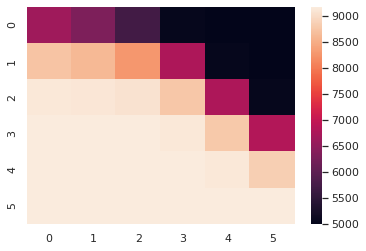

In [ ]:
#3.Haga un mapa de calor (a3) con los valores de α y l1_ratio del punto anterior y los valores de RMSE.

import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics

alpha=[0.01,0.1,1,10,100,1000]
l1_ratio = [0.1,0.3,0.6,0.9,0.99,0.999]

rms=[]

for a in alpha:
  rms.append([])
  for l in l1_ratio:
    elastic = ElasticNet(alpha=a,l1_ratio=l,normalize=True)
    elastic.fit(XTrain,yTrain)
    yPred = elastic.predict(XTest)
    rms[-1].append(np.sqrt(metrics.mean_squared_error(yTest, yPred)))

heat_map = sb.heatmap(rms)

**Ejercicios guia 8** (El ejercicio de implementar yolo3 para el reconocimiento de animales fue enviado hace un par de semanas)

**Ejercicios guia 9** (En este cuaderno se hizo una exposición, no encontré ejercicios)

**Ejercicios guia 10**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import seaborn as sns

path="/content/IMDB Dataset.csv"
df = pd.read_csv(path)

y=df["sentiment"].map({'positive':1, 'negative':0 })
x=df["review"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = pad_sequences(x_train, maxlen=500)
x_test = pad_sequences(x_test, maxlen=500)

model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=10000 , output_dim=32, input_length=500))
model.add(keras.layers.LSTM(20))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
model.fit(x_train,y_train, epochs=10, batch_size=256, validation_data=(x_test,y_test))

Epoch 1/10
157/157 [==============================] - 59s 363ms/step - loss: 0.4741 - acc: 0.7750 - val_loss: 0.3192 - val_acc: 0.8686
Epoch 2/10
157/157 [==============================] - 57s 361ms/step - loss: 0.2475 - acc: 0.9055 - val_loss: 0.2772 - val_acc: 0.8851
Epoch 3/10
157/157 [==============================] - 56s 358ms/step - loss: 0.1976 - acc: 0.9294 - val_loss: 0.2810 - val_acc: 0.8852
Epoch 4/10
157/157 [==============================] - 56s 359ms/step - loss: 0.1650 - acc: 0.9433 - val_loss: 0.2873 - val_acc: 0.8884
Epoch 5/10
157/157 [==============================] - 57s 361ms/step - loss: 0.1467 - acc: 0.9499 - val_loss: 0.2890 - val_acc: 0.8816
Epoch 6/10
157/157 [==============================] - 56s 359ms/step - loss: 0.1356 - acc: 0.9544 - val_loss: 0.3099 - val_acc: 0.8827
Epoch 7/10
157/157 [==============================] - 57s 361ms/step - loss: 0.1123 - acc: 0.9640 - val_loss: 0.3673 - val_acc: 0.8802
Epoch 8/10
157/157 [==============================] - 5